In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

arquivo = 'imd_notas2.xlsx'
excel = pd.ExcelFile(arquivo)
print(excel.sheet_names)
dados = excel.parse(0)



['Notas']


In [2]:
#1)
#A

sum_total_reprovacoes=0
sum_total_aprovacoes=0

for j in dados['disciplina_ID'].unique(): #disciplinas
    dados_disc = dados.loc[(dados['disciplina_ID'] == j)]
    dados_apro = dados_disc.loc[(dados['status.disciplina'] == 'Aprovado')] #lista de aprovados    
    dados_apro_repr = dados_disc.merge(dados_apro, left_on='a_ID', right_on='a_ID', how='outer')    
    
    total_reprovacoes = len(dados_apro_repr.loc[(dados_apro_repr["status.disciplina_x"]=="Reprovado") & (dados_apro_repr["status.disciplina_y"]=="Aprovado")])
    total_aprovacoes = len(dados_apro_repr.loc[(dados_apro_repr["status.disciplina_x"]=="Aprovado")]["a_ID"])
    
    sum_total_reprovacoes = sum_total_reprovacoes+total_reprovacoes
    sum_total_aprovacoes = sum_total_aprovacoes+total_aprovacoes
    
    print("Disciplina id ", j, " = ", (total_reprovacoes+total_aprovacoes)/total_aprovacoes)
    
#B
print("\n\nGeral = ", (sum_total_reprovacoes+sum_total_aprovacoes)/sum_total_aprovacoes )

Disciplina id  0  =  1.2655826558265582
Disciplina id  1  =  1.0269058295964126
Disciplina id  2  =  1.1267605633802817
Disciplina id  3  =  1.3333333333333333
Disciplina id  4  =  1.0313111545988258
Disciplina id  5  =  1.3549618320610688
Disciplina id  6  =  1.0889679715302492


Geral =  1.136623748211731


In [269]:
#2

#fig = plt.figure(figsize=(20,4))
#ax1 = fig.add_subplot(1,1,1)
#ax1.hist(dados['CEP'], range=(0,9999999))
#ax1.hist(dados['nota'], range=(0,10))

#plt.show()
dados2 = dados
dados2['status.disciplina'] = dados2['status.disciplina'].replace(['Aprovado'], 1)
dados2['status.disciplina'] = dados2['status.disciplina'].replace(['Reprovado'], 0)
dados2 = dados[dados['CEP'].isin(dados['CEP'].value_counts()[0:20].index)]
dados3 = pd.pivot_table(dados2, values='status.disciplina', index=['CEP'], aggfunc=np.mean)
dados3["numero_ocorrencias_cep"] = dados['CEP'].value_counts()[0:20].values
print(dados3.sort_values('status.disciplina', ascending=[0]))



          status.disciplina  numero_ocorrencias_cep
CEP                                                
59700000           0.933333                      20
59550000           0.811321                      21
59650000           0.800000                      20
59151400           0.800000                      53
59152600           0.740741                      39
59347000           0.703704                      22
59151250           0.629630                      66
59190000           0.619048                      27
59290000           0.587156                      25
59162000           0.571429                      30
59173000           0.571429                      28
59570000           0.569767                      21
0                  0.560554                     289
59182000           0.545455                      27
59200000           0.520000                      27
59380000           0.500000                      22
59115190           0.500000                      86
59280000    

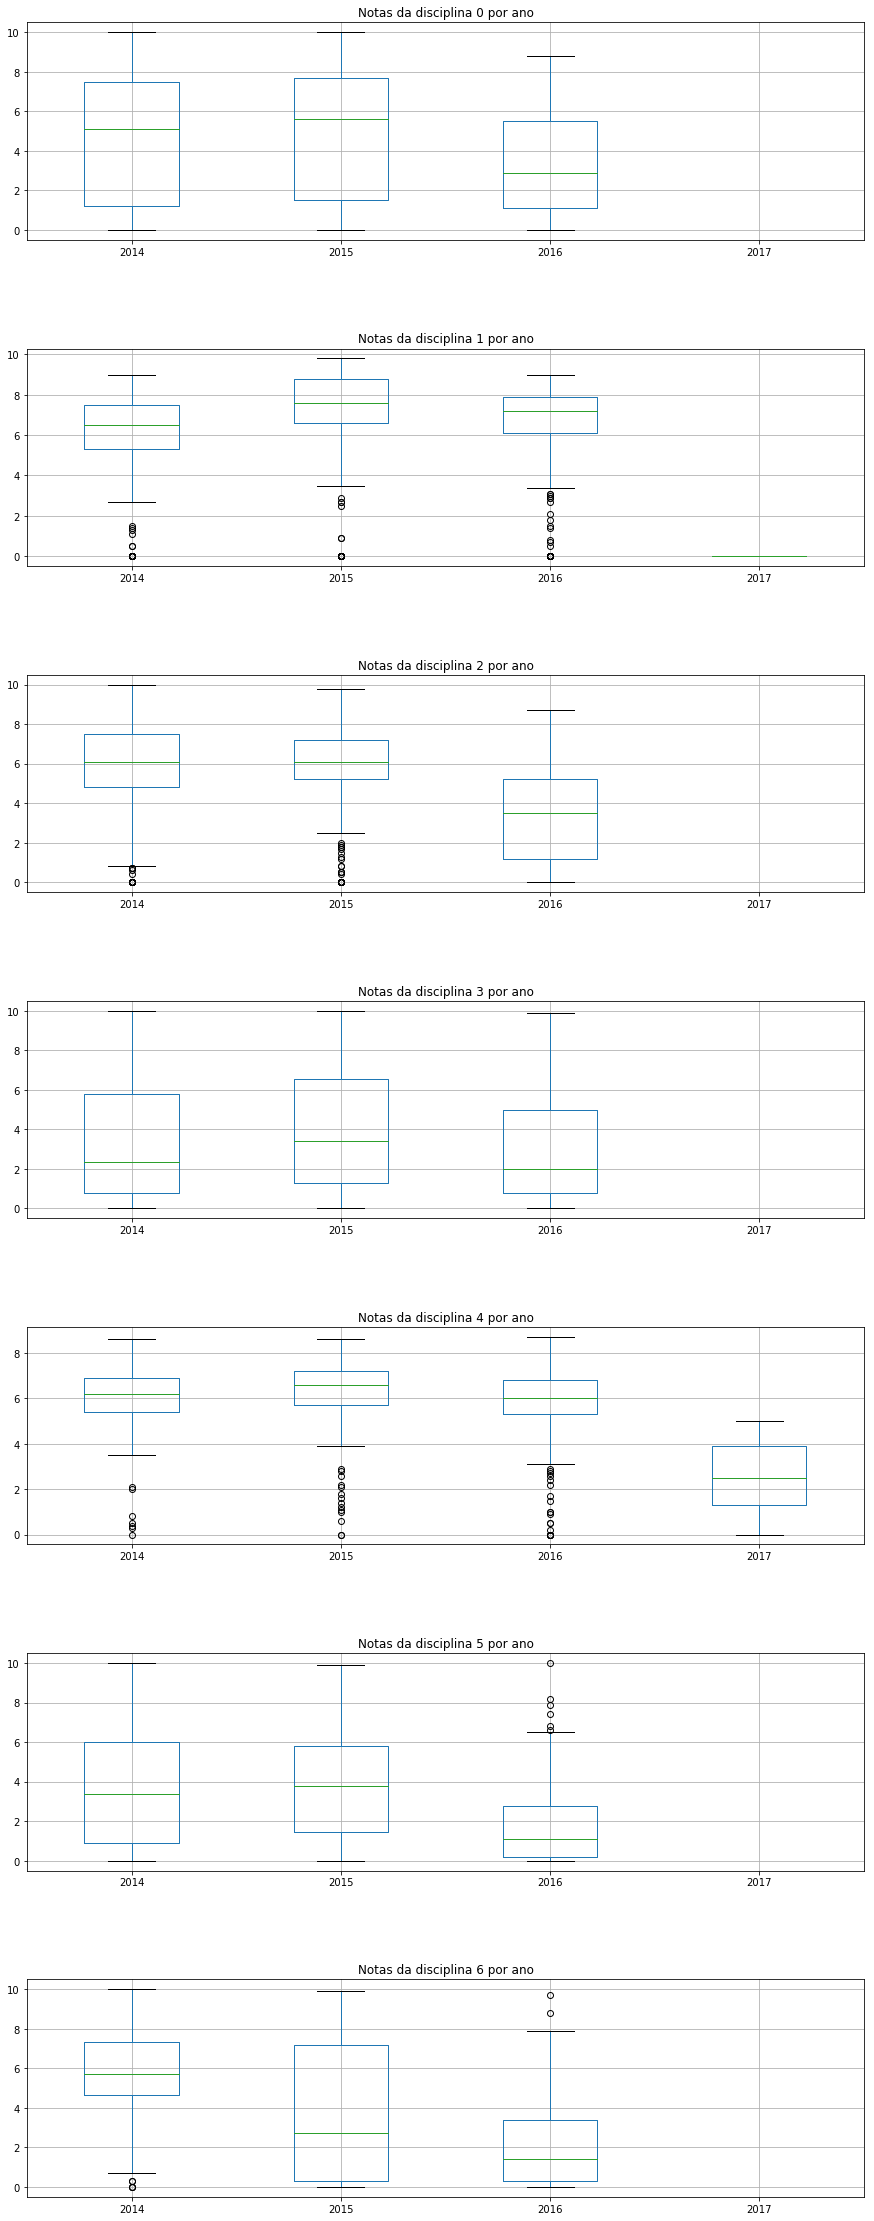

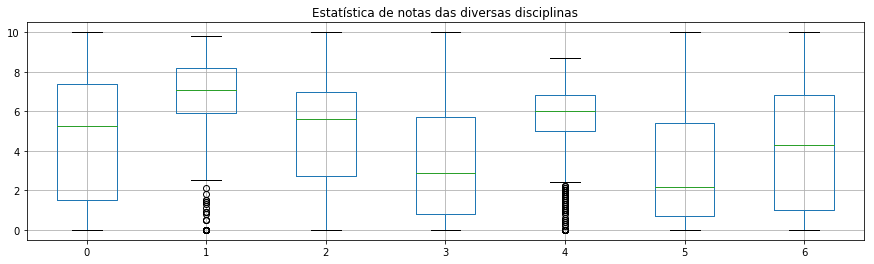

In [259]:
#3

#a
list_ano = dados['ano_disciplina'].unique()
list_disciplinas = dados['disciplina_ID'].unique()
fig3a, axes3a = plt.subplots(nrows=len(list_disciplinas), ncols=1, figsize=(15,40))
dados3a = pd.DataFrame()
count1 = 0

for disc in list_disciplinas:
    dados3a.drop(dados3a.index, inplace=True)
    axes3a[count1].title.set_text('Notas da disciplina '+str(disc)+' por ano')
    
    for ano in list_ano:
        dados3a[ano] = pd.Series(dados.loc[(dados['disciplina_ID']==disc) & (dados['ano_disciplina']==ano)]['nota'].tolist())

    dados3a.boxplot(ax=axes3a[count1])    
    count1 = count1+1
    
fig3a.subplots_adjust(hspace=.5)


#b
fig3b = plt.figure(figsize=(15,4))
df = pd.DataFrame()

for disc in list_disciplinas:
    df[disc]=pd.Series(dados.loc[dados['disciplina_ID'] == disc]['nota'].tolist())

df.boxplot()
plt.title('Estatística de notas das diversas disciplinas')
plt.show()



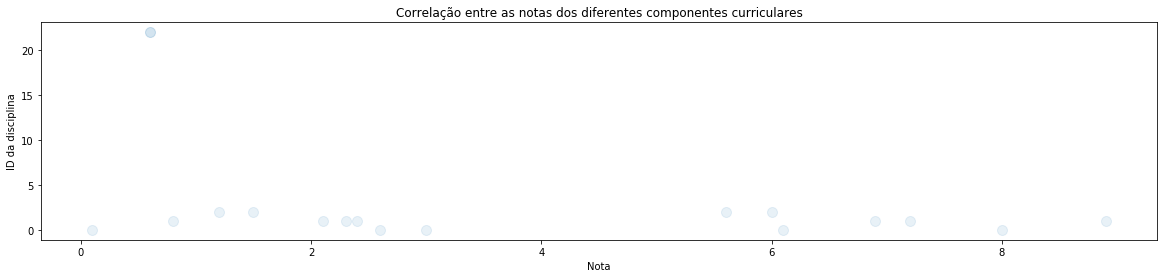

In [126]:
#4
fig2 = plt.figure(figsize=(20,4))
plt.title('Correlação entre as notas dos diferentes componentes curriculares')
plt.xlabel('Nota')
plt.ylabel('ID da disciplina')
X = dados['nota']
Y = dados['disciplina_ID']
plt.scatter(X,Y, alpha=0.1, s=100)

plt.show()


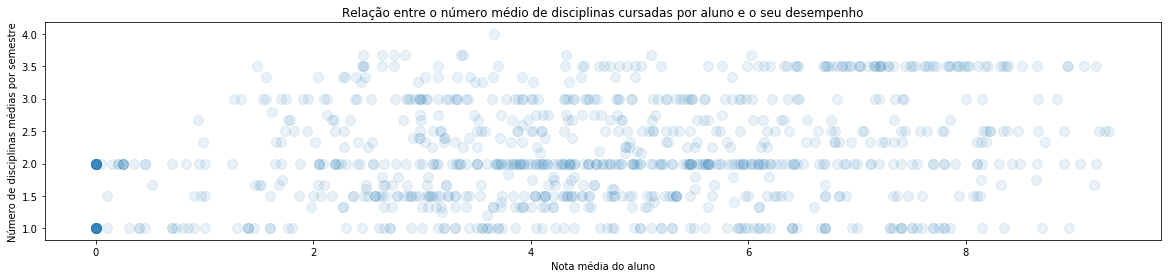

In [39]:
#5


dados["num_aux"]= 1
num_disciplinas = dados
num_disciplinas = num_disciplinas.groupby(['a_ID'])['num_aux'].sum().reset_index().set_index("a_ID")

num_semestres = pd.DataFrame()
num_semestres["num_semestres"] = dados.drop_duplicates(['a_ID', 'ano_disciplina', 'periodo_disciplina'])['a_ID'].value_counts()
num_semestres = num_semestres.reset_index().set_index("index")
num_semestres.index.names = ['a_ID']

nota_media = dados
nota_media = nota_media.groupby(['a_ID'])['nota'].mean()

num_disciplinas["media_disciplinas"] = num_disciplinas["num_aux"]/num_semestres["num_semestres"]
num_disciplinas["media_nota"] = dados.groupby(['a_ID'])['nota'].mean()


fig5 = plt.figure(figsize=(20,4))


Y = num_disciplinas["media_disciplinas"]
X = num_disciplinas["media_nota"]
plt.scatter(X,Y, alpha=0.1, s=100)

plt.title("Relação entre o número médio de disciplinas cursadas por aluno e o seu desempenho")
plt.ylabel("Número de disciplinas médias por semestre")
plt.xlabel("Nota média do aluno")

plt.show()



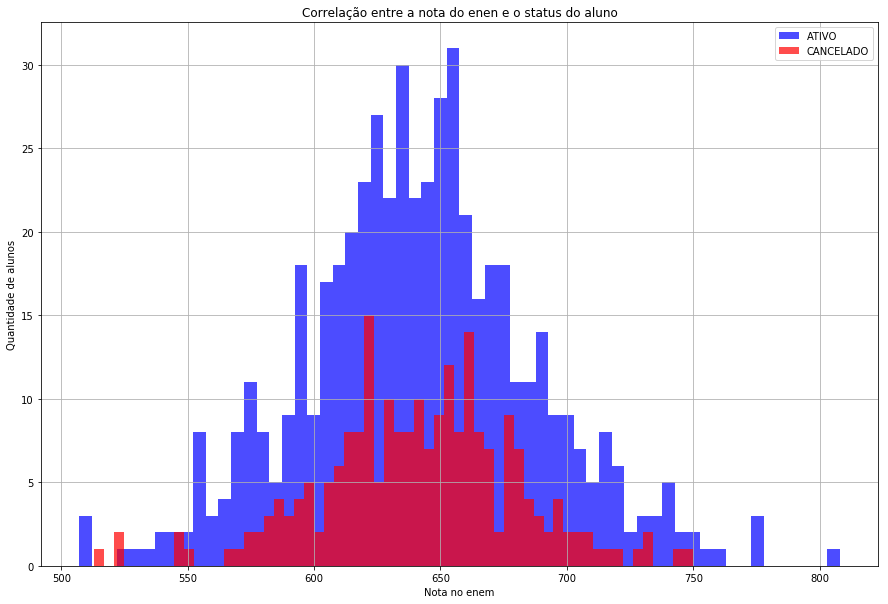

In [38]:
#6

fig6 = plt.figure(figsize=(15,10))

#d = pd.pivot_table(df,index='ID',columns='subindex',values='count').fillna(0)

ativo = dados.loc[dados['status'] == "ATIVO"].drop_duplicates(subset='a_ID')
cancelado = dados.loc[dados['status'] == "CANCELADO"].drop_duplicates(subset='a_ID')

ativo["enen-nota"].hist(color="blue", label="ATIVO", bins=60, alpha=0.7)
cancelado["enen-nota"].hist(color="red", label="CANCELADO", bins=60, alpha=0.7)

plt.legend()
plt.xlabel('Nota no enem')
plt.ylabel('Quantidade de alunos')
plt.title("Correlação entre a nota do enen e o status do aluno")
plt.show()



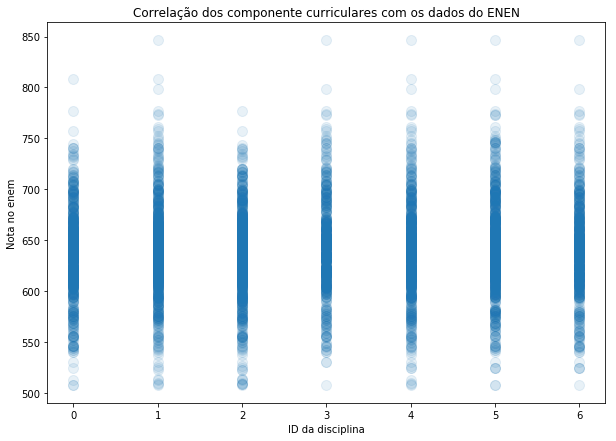

In [134]:
#7
%matplotlib inline

fig2 = plt.figure(figsize=(10,7))

#d = pd.pivot_table(df,index='ID',columns='subindex',values='count').fillna(0)

Y = dados['enen-nota']
X = dados['disciplina_ID']
plt.scatter(X,Y, alpha=0.1, s=100)
plt.xlabel('ID da disciplina')
plt.ylabel('Nota no enem')
plt.title("Correlação dos componente curriculares com os dados do ENEN")
plt.show()

